In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Variavel para escolher o escopo completo 2017-2024 Km 100 a 239 com Km da PRF ou escopo completo 2017-2024 Km 100 a 239 com Km da ANTT
escopo = 'completo_antt'  # 'completo' ou 'completo_antt'

In [3]:
df_2024 = pd.read_csv('https://drive.google.com/uc?export=download&id=1YGcXBLH_5-59wQibasR-6VHEKaK47kMs', encoding='latin1', delimiter=';')
df_2023 = pd.read_csv('https://drive.google.com/uc?export=download&id=1_f6qGoJwqluOfeBzpibotFoDVPQZ3njr', encoding='latin1', delimiter=';')
df_2022 = pd.read_csv('https://drive.google.com/uc?export=download&id=17IUo01wirfmH-4RW7M_fB3tsSuWmWIE0', encoding='latin1', delimiter=';')
df_2021 = pd.read_csv('https://drive.google.com/uc?export=download&id=1EhS7pfOcjSpCM-edzhS7ujDXy4gxECcG', encoding='latin1', delimiter=';')
df_2020 = pd.read_csv('https://drive.google.com/uc?export=download&id=1yzXkKqJTdgECUykskI-iOKCYX5gFQN5y', encoding='latin1', delimiter=';')
df_2019 = pd.read_csv('https://drive.google.com/uc?export=download&id=1JSehd4431JHfcYJXLChW-jfgUaCG_UP0', encoding='latin1', delimiter=';')
df_2018 = pd.read_csv('https://drive.google.com/uc?export=download&id=1ultdVyJlsLxl-zURVCS5pCr992FbqY66', encoding='latin1', delimiter=';')
df_2017 = pd.read_csv('https://drive.google.com/uc?export=download&id=1S8UcBGMrQiyinyX51yrVyBhch3ayrByx', encoding='latin1', delimiter=';')

In [ ]:
df_todos_anos = pd.concat([df_2024, df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017], axis=0)
df_todos_anos

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,-18.48261,-39.92379,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89562,547182.0,2017-04-10,segunda-feira,07:00:00,CE,20,"16,5",EUSEBIO,Falta de Atenção à Condução,Colisão traseira,...,0,4,0,0,4,"-3,89643058","-38,50331694",SPRF-CE,DEL02-CE,UOP02-DEL02-CE
89563,555322.0,2017-10-15,domingo,12:35:00,PR,116,"15,5",CAMPINA GRANDE DO SUL,Velocidade Incompatível,Saída de leito carroçável,...,0,1,0,0,1,"-25,10049901","-48,69404558",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
89564,556942.0,2017-02-07,terça-feira,19:05:00,RS,116,"198,1",PICADA CAFE,Animais na Pista,Atropelamento de Animal,...,0,0,0,1,1,"-29,47290623","-51,14826679",SPRF-RS,DEL05-RS,UOP02-DEL05-RS
89565,599256.0,2017-10-23,segunda-feira,18:22:00,RJ,40,3,COMENDADOR LEVY GASPARIAN,Falta de Atenção à Condução,Capotamento,...,0,0,0,1,1,"-22,0135","-43,2358",SPRF-RJ,DEL06-RJ,UOP02-DEL05-RJ


In [5]:
# Aplicar regras de filtragem
def padronizar_df(df):
    df['km'] = df['km'].str.replace(',', '.').astype(float)
    df['latitude'] = df['latitude'].astype(str).str.replace(',', '.')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = df['longitude'].astype(str).str.replace(',', '.')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')    
    df['datetime'] = pd.to_datetime(df['data_inversa'] + ' ' + df['horario'].str[:2])
    if escopo == 'completo' or escopo == 'completo_antt':
        df = df[(df.uf == 'SC') & (df.br == 101) & ((df.km < 239) & (df.km >= 100))]
    else:
        df = df[(df.uf == 'SC') & (df.br == 101) & ((df.km < 149) & (df.km >= 139))]
        df = df[df['datetime'].dt.year == 2023]
    df = df[['datetime', 'km', 'sentido_via', 'latitude', 'longitude']]
    df['acidente'] = 1
    
    return df

df_todos_anos = padronizar_df(df_todos_anos)
df_todos_anos

,datetime,km,sentido_via,latitude,longitude,acidente
86,2023-01-04 07:00:00,145.0,Crescente,-27.081392,-48.601310,1
2607,2023-03-07 10:00:00,139.0,Crescente,-27.029823,-48.601150,1
2792,2023-03-10 16:00:00,148.0,Crescente,-27.101237,-48.618080,1
3863,2023-04-01 12:00:00,141.7,Crescente,-27.047617,-48.599959,1
3885,2023-04-01 15:00:00,148.0,Decrescente,-27.101237,-48.618080,1
...,...,...,...,...,...,...
66597,2023-12-27 07:00:00,146.5,Crescente,-27.086665,-48.609556,1
66744,2023-12-28 08:00:00,148.7,Crescente,-27.101237,-48.618080,1
66771,2023-12-28 14:00:00,140.0,Crescente,-27.047201,-48.599782,1
66879,2023-12-29 10:00:00,139.0,Crescente,-27.029823,-48.601150,1


In [ ]:
if escopo == 'completo_antt':
    df_caracteristicas = pd.read_csv('https://drive.google.com/uc?export=download&id=12IEjF4wPAurDEhY7YrOyGe-APN9OM_Ls')
    df_caracteristicas = df_caracteristicas[['sentido_via', 'km', 'latitude', 'longitude']]
    df_caracteristicas = df_caracteristicas.sort_values(by='latitude')
    df_todos_anos = df_todos_anos.sort_values(by='latitude')

    df_todos_anos_ = pd.merge_asof(df_todos_anos, df_caracteristicas, 
                            on='latitude', by=['sentido_via'], 
                            direction='nearest', tolerance=0.05)  
    df_todos_anos_ = df_todos_anos_.dropna(axis=0)
    df_todos_anos = df_todos_anos_.rename(columns={"km_y": "km"})
    df_todos_anos = df_todos_anos[['datetime', 'sentido_via', 'km', 'acidente']]

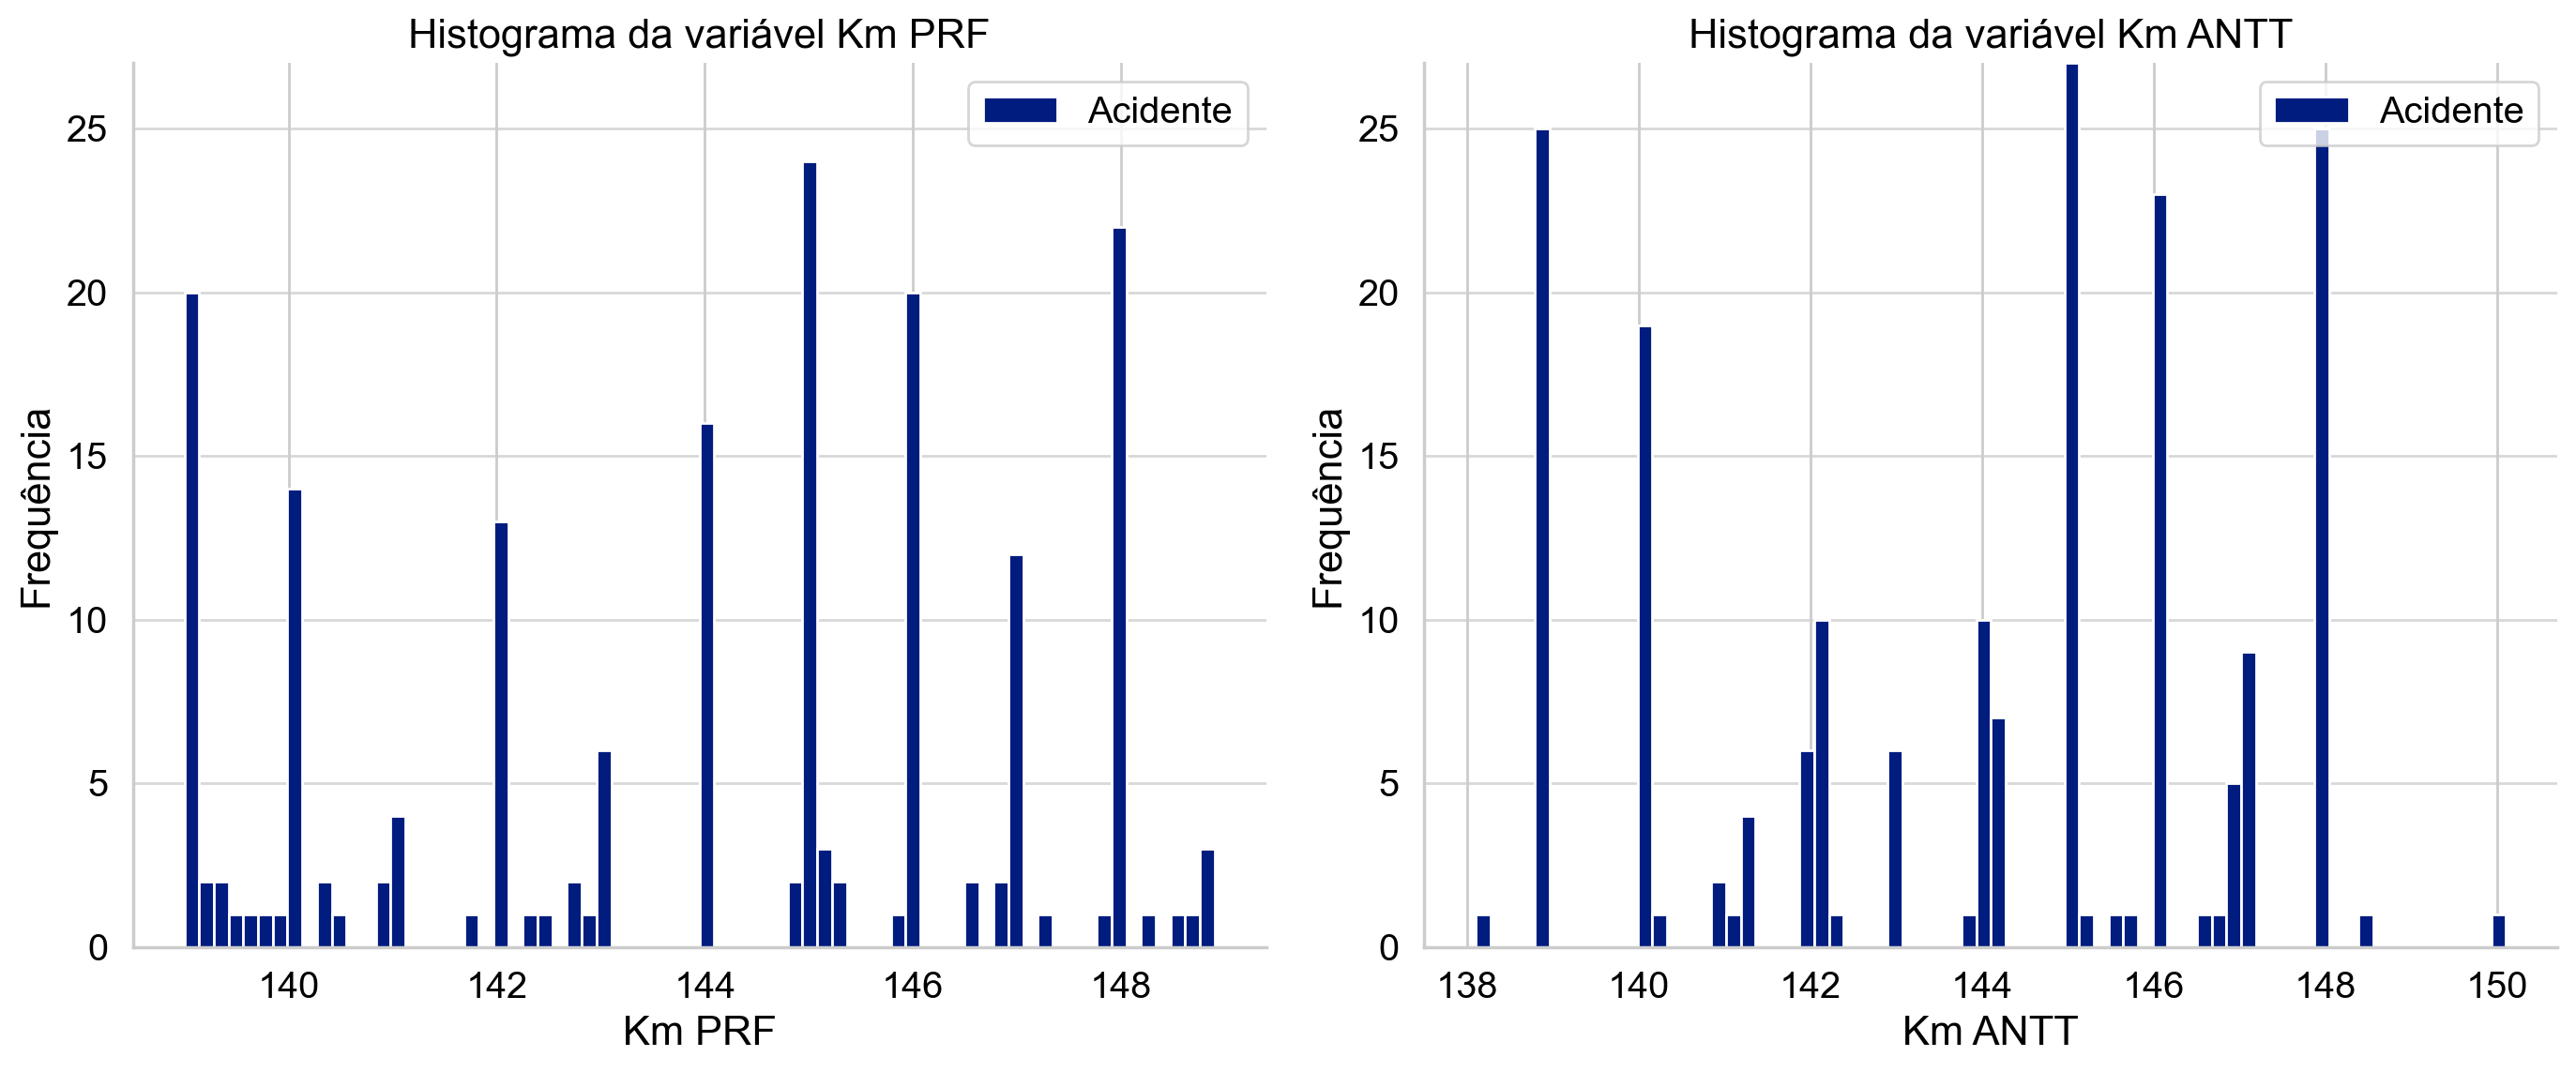

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if escopo == 'completo_antt':

    sns.set_theme(
        style="whitegrid",
        palette="dark",
        font='sans-serif',
        font_scale=1.3,
        rc={
            "axes.spines.right": False,
            "axes.spines.top": False,
            "figure.figsize": (10, 6),
            "axes.facecolor": "white",
            "figure.facecolor": "white",
            "text.color": "black",           # Cor padrão do texto
            "axes.labelcolor": "black",      # Cor dos rótulos dos eixos
            "xtick.color": "black",          # Cor dos ticks do eixo x
            "ytick.color": "black",          # Cor dos ticks do eixo y
            "axes.titlecolor": "black",      # Cor do título dos eixos
        }
    )

    %config InlineBackend.figure_format = 'retina'

    numericas = ['km_x', 'km_y']
    dic = {'km_x': 'Km PRF', 'km_y': 'Km ANTT'}

    max_y = 0
    for var in numericas:
        counts, _ = np.histogram(df_todos_anos_[df_todos_anos_['acidente'] == 1][var], bins=70)
        max_y = max(max_y, counts.max())

    plt.figure(figsize=(14, 6))
    for i, var in enumerate(numericas, 1):
        plt.subplot(1, 2, i)
        df_todos_anos_[df_todos_anos_['acidente'] == 1][var].plot(kind='hist', bins=70, label='Acidente')

        plt.ylim(0, max_y)  

        plt.title(f'Histograma da variável {dic[var]}')
        plt.xlabel(dic[var])
        plt.ylabel('Frequência')
        plt.grid(axis='y', alpha=0.75)
        plt.legend()

    plt.tight_layout()

In [ ]:
kms = np.round(np.arange(100, 239, 0.1), 1)
horas = pd.date_range(start="2017-01-01", end="2024-12-31 23:00", freq="h")

sentido = df_todos_anos['sentido_via'].unique()

df_completo = pd.MultiIndex.from_product([horas,  kms, sentido], names=['datetime', 'km', 'sentido_via']).to_frame(index=False)
df_completo

,datetime,km,sentido_via
0,2023-01-01 00:00:00,139.0,Decrescente
1,2023-01-01 00:00:00,139.0,Crescente
2,2023-01-01 00:00:00,139.1,Decrescente
3,2023-01-01 00:00:00,139.1,Crescente
4,2023-01-01 00:00:00,139.2,Decrescente
...,...,...,...
1751995,2023-12-31 23:00:00,148.7,Crescente
1751996,2023-12-31 23:00:00,148.8,Decrescente
1751997,2023-12-31 23:00:00,148.8,Crescente
1751998,2023-12-31 23:00:00,148.9,Decrescente


In [9]:
df_completo = df_completo.sort_values(by='km')
df_todos_anos = df_todos_anos.sort_values(by='km')

df_completo = pd.merge_asof(df_completo, df_todos_anos, 
                           on='km', by=['datetime', 'sentido_via'], 
                           direction='nearest', tolerance=0.05)  

df_completo = df_completo.fillna(0)
df_completo

,datetime,km,sentido_via,acidente
0,2023-01-01 00:00:00,139.0,Decrescente,0.0
1,2023-09-23 11:00:00,139.0,Crescente,0.0
2,2023-09-23 12:00:00,139.0,Decrescente,0.0
3,2023-09-23 12:00:00,139.0,Crescente,0.0
4,2023-09-23 13:00:00,139.0,Decrescente,0.0
...,...,...,...,...
1751995,2023-08-29 18:00:00,148.9,Decrescente,0.0
1751996,2023-08-29 17:00:00,148.9,Crescente,0.0
1751997,2023-08-29 17:00:00,148.9,Decrescente,0.0
1751998,2023-08-30 00:00:00,148.9,Decrescente,0.0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_completo, test_size=0.01, stratify=df_completo['acidente'])

df_nao_acidente_train = train[train['acidente'] == 0]
df_acidente_train = train[train['acidente'] == 1]

tamanho = len(df_acidente_train)  
df_nao_acidente_subamostrado = df_nao_acidente_train.sample(tamanho)
df_train_balanceado = pd.concat([df_nao_acidente_subamostrado, df_acidente_train])

df_test = test

print("Tamanho do conjunto de treinamento balanceado:", len(df_train_balanceado))
print("Tamanho do conjunto de teste:", len(df_test))
print("Proporção de acidentes no conjunto de treinamento balanceado:", df_train_balanceado['acidente'].mean())
print("Proporção de acidentes no conjunto de teste:", df_test['acidente'].mean())

Tamanho do conjunto de treinamento balanceado: 294
Tamanho do conjunto de teste: 175200
Proporção de acidentes no conjunto de treinamento balanceado: 0.5
Proporção de acidentes no conjunto de teste: 9.132420091324201e-05


In [ ]:
if escopo == 'completo':
    df_train_balanceado.to_csv('data/escopo_completo/df_train.csv', index=False)
    df_test.to_csv('data/escopo_completo/df_test.csv', index=False)
elif escopo == 'completo_antt':
    df_train_balanceado.to_csv('data/escopo_completo_antt/df_train.csv', index=False)
    df_test.to_csv('data/escopo_completo_antt/df_test.csv', index=False)